# 6. Deep Learning

## 6.1. Fashion classification

Dataset:

https://github.com/alexeygrigorev/clothing-dataset-small

## 6.2. TensorFlow and Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
# libreria para cargar imagenes
from tensorflow.keras.preprocessing.image import load_img

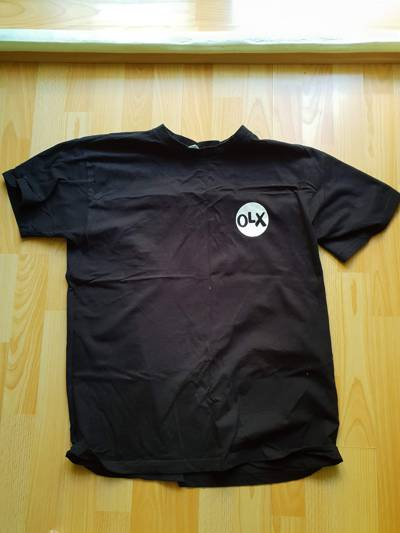

In [5]:
path = './clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
fullname
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299,299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 6.3. Pre-Trained convolutional neural networks

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights= 'imagenet', input_shape=(299,299,3))

In [11]:
X = np.array([x])

In [12]:
# (una imagen, 299x299, 3 canales)
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 [==============================] - 6s 6s/step


In [15]:

decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196404),
  ('n02916936', 'bulletproof_vest', 0.038139857),
  ('n04370456', 'sweatshirt', 0.034324694),
  ('n03710637', 'maillot', 0.011354211),
  ('n04525038', 'velvet', 0.0018453557)]]

## 6.4. Convolutional Neural Network

---

## 6.5. Transfer Learning

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# preprocessing_function: funcion que se va a aplicar a cada imagen
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# batch_size: cuantas imagenes se van a procesar a la vez
train_ds = train_gen.flow_from_directory('./clothing-dataset-small-master/train', target_size= (150,150), batch_size=32)

In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [8]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small-master/validation', target_size= (150,150), batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))

base_model.trainable = False # no se van a actualizar los pesos de la red


inputs = keras.Input(shape=(150,150,3)) # 150x150, 3 canales

base = base_model(inputs, training=False) # no se va a entrenar

vectors= keras.layers.GlobalAveragePooling2D()(base) # promedio de los vectores

outputs = keras.layers.Dense(10)(vectors) # 10 clases 

model = keras.Model(inputs, outputs) # modelo final

In [37]:
# preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [38]:
# preds.shape

(32, 10)

In [23]:
learning_rate=0.1 
optimazer = keras.optimizers.Adam(learning_rate=learning_rate) # optimizador

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # funcion de perdida

model.compile(optimizer= optimazer, loss=loss, metrics=['accuracy']) # configuracion del modelo

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds) # entrenamiento

Epoch 1/10
96/96 [==============================] - 99s 928ms/step - loss: 10.4048 - accuracy: 0.6336 - val_loss: 7.3147 - val_accuracy: 0.7155
Epoch 2/10
96/96 [==============================] - 70s 724ms/step - loss: 5.5174 - accuracy: 0.7686 - val_loss: 11.3186 - val_accuracy: 0.7126
Epoch 3/10
96/96 [==============================] - 70s 724ms/step - loss: 4.3873 - accuracy: 0.8165 - val_loss: 7.5756 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 70s 725ms/step - loss: 2.3998 - accuracy: 0.8846 - val_loss: 8.2914 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 70s 724ms/step - loss: 2.0886 - accuracy: 0.8934 - val_loss: 9.5424 - val_accuracy: 0.7713
Epoch 6/10
96/96 [==============================] - 70s 724ms/step - loss: 2.3521 - accuracy: 0.8843 - val_loss: 10.0901 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 70s 724ms/step - loss: 1.4572 - accuracy: 0.9195 - val_loss: 10.7373 - val_accuracy: 0.

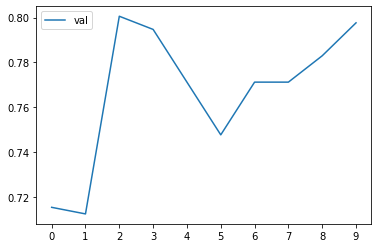

In [25]:

#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val') # accuracy en el conjunto de validacion

plt.xticks(np.arange(10))
plt.legend()

## 6.6. Adjusting the learning rate

In [9]:
def make_model(learning_rate=0.01):

    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False

#############################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors= keras.layers.GlobalAveragePooling2D()(base) 
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

#############################################################

    optimazer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer= optimazer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
# scores = {}

# for lr in [0.0001, 0.001,0.01,0.1]:
#     print(lr)

#     model = make_model(learning_rate=lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history

#     print()
#     print()

In [ ]:
# for lr, hist in scores.items():

#     plt.plot(hist['accuracy'], label=('train=%s' %lr))
#     plt.plot(hist['val_accuracy'], label=('val=%s' %lr))

#     plt.xticks(np.arange(10))
#     plt.legend()

the best LR -> learning_rate = 0.001

In [10]:
model = make_model(learning_rate=0.001)

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 86s 788ms/step - loss: 1.0981 - accuracy: 0.6301 - val_loss: 0.7027 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 70s 724ms/step - loss: 0.6242 - accuracy: 0.7813 - val_loss: 0.6334 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 70s 725ms/step - loss: 0.5036 - accuracy: 0.8305 - val_loss: 0.5800 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 70s 724ms/step - loss: 0.4293 - accuracy: 0.8579 - val_loss: 0.5807 - val_accuracy: 0.7889
Epoch 5/10
96/96 [==============================] - 70s 724ms/step - loss: 0.3744 - accuracy: 0.8836 - val_loss: 0.5493 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 70s 724ms/step - loss: 0.3320 - accuracy: 0.8954 - val_loss: 0.5464 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 70s 724ms/step - loss: 0.2883 - accuracy: 0.9201 - val_loss: 0.5412 - val_accuracy: 0.8152

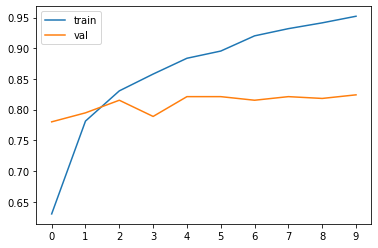

In [15]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))
plt.legend()

## 6.7. Checkpoint

In [16]:
model.save_weights('model_v1.h5', save_format='h5') # guardar pesos de la red neuronal en un archivo h5 (hdf5) 

In [17]:
# 
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', # nombre del archivo
    save_best_only=True, # guardar solo el mejor modelo
    monitor = 'val_accuracy', # metrica que se va a monitorear
    mode='max' # maximizar la metrica
)

In [18]:
learning_rate= 0.001


model = make_model(learning_rate=learning_rate) # modelo
history = model.fit( # entrenamiento
    train_ds, # conjunto de entrenamiento 
    epochs=10, # epocas
    validation_data=val_ds, # conjunto de validacion
    callbacks=[checkpoint] # callback para guardar los pesos 
)

Epoch 1/10
96/96 [==============================] - 80s 772ms/step - loss: 1.0987 - accuracy: 0.6284 - val_loss: 0.7244 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 71s 738ms/step - loss: 0.6339 - accuracy: 0.7868 - val_loss: 0.6508 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 70s 730ms/step - loss: 0.5150 - accuracy: 0.8237 - val_loss: 0.6323 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 71s 739ms/step - loss: 0.4370 - accuracy: 0.8566 - val_loss: 0.5832 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 70s 729ms/step - loss: 0.3732 - accuracy: 0.8814 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 70s 729ms/step - loss: 0.3272 - accuracy: 0.9051 - val_loss: 0.5492 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 71s 738ms/step - loss: 0.2911 - accuracy: 0.9201 - val_loss: 0.5421 - val_accuracy: 0.8358

## 6.8. Adding more layers

In [19]:
def make_model(learning_rate=0.01, size_inner= 100): # tamaño de la capa oculta

    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False

#############################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors= keras.layers.GlobalAveragePooling2D()(base)

    # 100 neuronas en la capa oculta 
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # capa oculta agregada lo que hace es que se agregan mas neuronas a la red para poder tener mas parametros y poder ajustar mejor los datos

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

#############################################################

    optimazer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer= optimazer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
# learning_rate = 0.001

# scores = {}

# for size in [10, 100, 1000]:
#     print(size)
    
#     model = make_model(learning_rate=learning_rate, size_inner=size)
#     history = model.fit(train_ds, epoch=10, validation_data=val_ds)
#     scores[size] = history.history

#     print()
#     print()

In [ ]:
# for size, hist in scores.items():

#     plt.plot(hist['accuracy'], label=('train=%s' %size))
#     plt.plot(hist['val_accuracy'], label=('val=%s' %size))

#     plt.xticks(np.arange(10))
#     plt.legend()

the best size -> size = 100

## 6.9. Regularization and dropout

In [25]:
def make_model(learning_rate=0.01, size_inner= 100, droprate=0.5): # droprate es la probabilidad de que una neurona se apague

    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False

#############################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors= keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # dropout es una capa que se agrega para evitar el overfitting lo que hace es que apaga algunas neuronas de manera aleatoria

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

#############################################################

    optimazer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer= optimazer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
# learning_rate = 0.001
# size = 100

# scores = {}

# for droprate in [0.0, 0.2, 0.5, 0.8]:
#     print(size)
    
#     model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
#     history = model.fit(train_ds, epoch=10, validation_data=val_ds)
#     scores[size] = history.history

#     print()
#     print()

In [ ]:
# for droprate, hist in scores.items():

#     plt.plot(hist['accuracy'], label=('train=%s' %droprate))
#     plt.plot(hist['val_accuracy'], label=('val=%s' %droprate))

#     plt.xticks(np.arange(10))
#     plt.legend()

the best droprate -> droprate= 0.2

## 6.10. Data Augmentation

In [23]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0, # rotar la imagen
    zoom_range=0.1, # hacer zoom a la imagen
    vertical_flip=True # voltear la imagen
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size = (150,150),
    batch_size =32
)

val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size = (150,150),
    batch_size = 32,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


### 6.10.1. Choosing augmentations

- Use your own judgement
- Look at the dataset, what kind of variations are there?
    - Are the objects always centered? # Shift, rotate
- Tune it as a hyperparameter
    - Train it for 10-20 epochs
    - is it better? Yes? USE No? DON'T USE

In [28]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner= size,
    droprate= droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 80s 752ms/step - loss: 1.2878 - accuracy: 0.5701 - val_loss: 0.7272 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 75s 780ms/step - loss: 0.8832 - accuracy: 0.6985 - val_loss: 0.7200 - val_accuracy: 0.7419
Epoch 3/10
96/96 [==============================] - 70s 728ms/step - loss: 0.7861 - accuracy: 0.7278 - val_loss: 0.6558 - val_accuracy: 0.7713
Epoch 4/10
96/96 [==============================] - 70s 728ms/step - loss: 0.6937 - accuracy: 0.7608 - val_loss: 0.6285 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 70s 727ms/step - loss: 0.6535 - accuracy: 0.7728 - val_loss: 0.6359 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 70s 727ms/step - loss: 0.5989 - accuracy: 0.7947 - val_loss: 0.6162 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 70s 727ms/step - loss: 0.5438 - accuracy: 0.8051 - val_loss: 0.6210 - val_accuracy: 0.7742

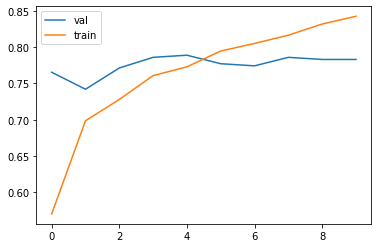

In [29]:
hist = history.history

plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

## 6.11. Training a larger model

In [30]:
def make_model(input_size = 150, learning_rate=0.01, size_inner= 100, droprate=0.5):

    base_model = Xception(weights='imagenet', include_top=False, input_shape=(input_size,input_size,3))
    base_model.trainable = False

#############################################################

    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training=False)
    vectors= keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

#############################################################

    optimazer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer= optimazer, loss=loss, metrics=['accuracy'])

    return model

In [31]:
input_size = 299

In [36]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size = (input_size,input_size),
    batch_size =16
)

val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size = (input_size,input_size),
    batch_size = 16,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [33]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor = 'val_accuracy',
    mode='max'
)

In [37]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size= 299,
    learning_rate=learning_rate,
    size_inner= size,
    droprate= droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks= [checkpoint])

Epoch 1/10
192/192 [==============================] - 283s 1s/step - loss: 0.8752 - accuracy: 0.7200 - val_loss: 0.4720 - val_accuracy: 0.8475
Epoch 2/10
192/192 [==============================] - 268s 1s/step - loss: 0.4767 - accuracy: 0.8308 - val_loss: 0.3953 - val_accuracy: 0.8680
Epoch 3/10
192/192 [==============================] - 267s 1s/step - loss: 0.3970 - accuracy: 0.8647 - val_loss: 0.3782 - val_accuracy: 0.8622
Epoch 4/10
192/192 [==============================] - 268s 1s/step - loss: 0.3717 - accuracy: 0.8745 - val_loss: 0.3548 - val_accuracy: 0.8710
Epoch 5/10
192/192 [==============================] - 268s 1s/step - loss: 0.3225 - accuracy: 0.8902 - val_loss: 0.3787 - val_accuracy: 0.8592
Epoch 6/10
192/192 [==============================] - 268s 1s/step - loss: 0.2878 - accuracy: 0.9025 - val_loss: 0.3547 - val_accuracy: 0.8798
Epoch 7/10
192/192 [==============================] - 267s 1s/step - loss: 0.2740 - accuracy: 0.9055 - val_loss: 0.3532 - val_accuracy: 0.8680

Recomendaciones:

* Podemos usar modelos preentrenados para la clasificación general de imágenes.
* Las capas de convolución nos permiten convertir una imagen en un vector.
* Las capas densas utilizan el vector para hacer predicciones.
* En lugar de entrenar un modelo desde cero, podemos utilizar transfer learning y reutilizar capas de convolución ya entrenadas.
* Primero, entrena un modelo pequeño (150x150) antes de entrenar uno grande (299x299).
* Tasa de aprendizaje: qué tan rápido aprende el modelo. Los aprendices rápidos no siempre son los mejores.
* Podemos guardar el mejor modelo utilizando callbacks y puntos de control.
* Para evitar el sobreajuste, utiliza la eliminación y la aumentación de datos.